In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

loading the dataset

In [2]:
loan_data = pd.read_csv('loan_data_set.csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#data cleaning
#gender section
loan_data = loan_data.dropna()
loan_data =  loan_data.drop(columns='Loan_ID', axis=1)
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#label encoding
from sklearn.preprocessing import LabelEncoder

content = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' ]
label_encode = LabelEncoder()

for i in content:
    loan_data[i] = label_encode.fit_transform(loan_data[i])

loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


IMPORT THINGS TO NOTE
1. for Gender: female[0] & male[1].
2. for married: No[0] & Yes[1].
3. for education: graduate[0], Not graduate[1].
4. for self_employed: No[0], Yes[1].
5. For property_area: Rural[0], Urban[2], Semiurban[1].
6. Loan status: No[0], Yes[1].


In [6]:
loan_data['Dependents']=loan_data['Dependents'].replace(to_replace='3+', value=4 )
loan_data['Dependents']=loan_data['Dependents'].astype(int)

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int32  
 1   Married            480 non-null    int32  
 2   Dependents         480 non-null    int32  
 3   Education          480 non-null    int32  
 4   Self_Employed      480 non-null    int32  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int32  
 11  Loan_Status        480 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 35.6 KB


In [8]:
loan_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.862500,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.225107,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


quick analysis

In [9]:
#correlation matrix
loan_data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.209408,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.359132,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.209408,0.359132,1.000000,0.031106,0.034973,0.142074,-0.004606,0.170318,-0.095554,-0.036777,-0.020823,0.028199
Education,0.059245,0.001652,0.031106,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.034973,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.142074,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.004606,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.170318,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.095554,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.036777,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


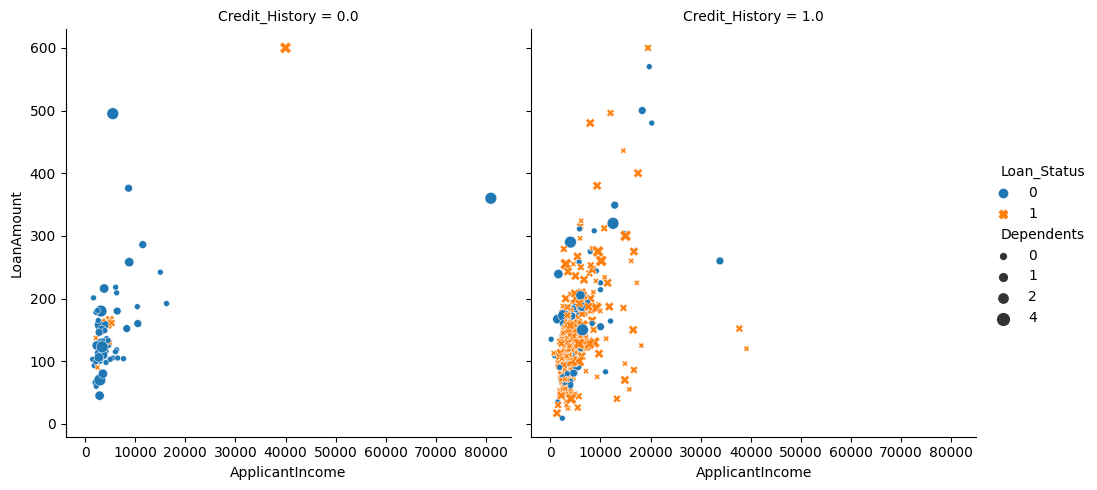

In [10]:
sns.relplot(data=loan_data, x='ApplicantIncome', y='LoanAmount', col='Credit_History', hue='Loan_Status', style='Loan_Status', size='Dependents')

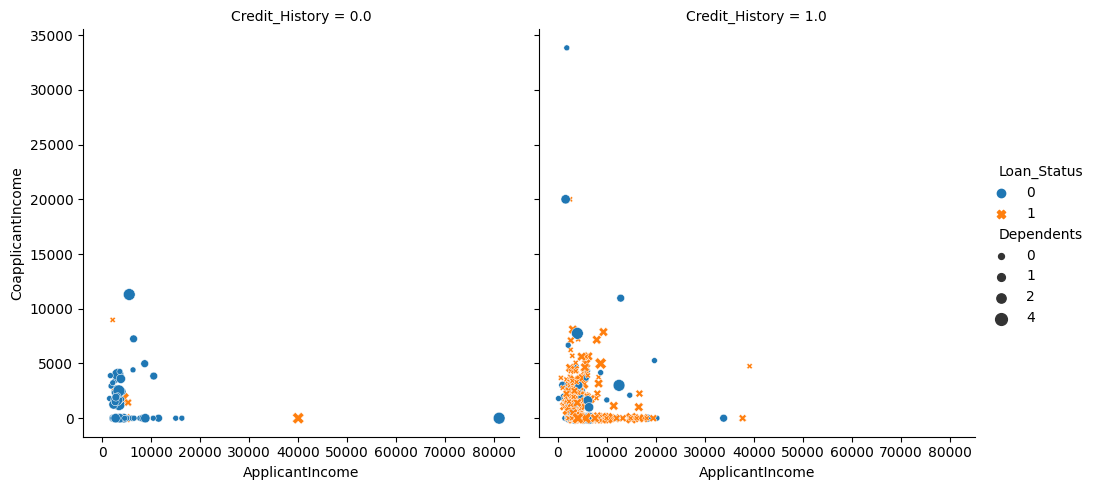

In [11]:
sns.relplot(data=loan_data, x='ApplicantIncome', y='CoapplicantIncome', col='Credit_History', hue='Loan_Status', style='Loan_Status', size='Dependents')

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

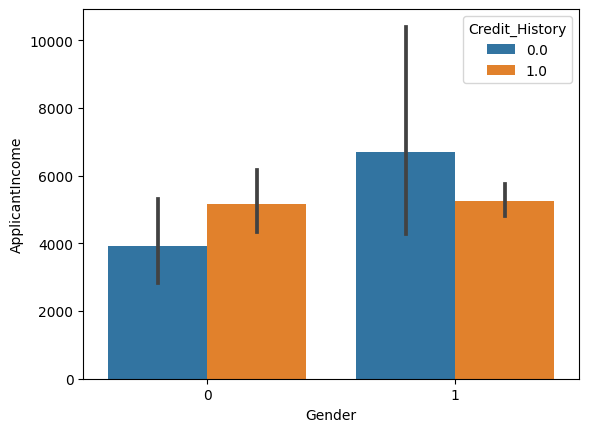

In [12]:
sns.barplot(x='Gender', y='ApplicantIncome', hue='Credit_History', data=loan_data)

The analysis shows that:
for female, higher percentage have good credit history which is the reverse in male.
Having high income, low dependents and good credit history makes the applicants stands high chance of obtaining the loan

In [26]:
#separating the target from features
x = loan_data.drop(columns='Loan_Status', axis=1)
y = loan_data['Loan_Status']
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [14]:
#splitting the data into train and test data
x_train,  x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)


MODEL FOR LOGISTIC REGRESSION

In [15]:
#training data
model = LogisticRegression()
model.fit(x_train, y_train)
x_train_pred = model.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train )
training_accuracy 

c:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8020833333333334

In [16]:
#test data
model = LogisticRegression()
model.fit(x_test, y_test)
x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred, y_test )
test_accuracy 

c:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8229166666666666

Support vector machine

In [17]:
#data standardization
from sklearn.preprocessing import StandardScaler
x = loan_data.drop(columns='Loan_Status', axis=1)
y = loan_data['Loan_Status']
scaler=StandardScaler()
standard_data=scaler.fit_transform(x)
x=standard_data

x_train,  x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)


In [18]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [19]:
#model evaluation
x_train_pred = classifier.predict(x_train) 
training_accuracy = accuracy_score(x_train_pred, y_train)
training_accuracy



0.8046875

In [20]:

#for test data
x_test_pred = classifier.predict(x_test) 
test_accuracy = accuracy_score(x_test_pred, y_test)
test_accuracy

0.8229166666666666

You can see that both gave the same accuracy. Thank you.

In [24]:
#saving the model

import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))


In [25]:
#building predictive system
#making a predictive system
input_data = (1, 0, 0, 0, 0, 5849, 0, 360,1, 1, 1)
input_array=np.asarray(input_data)
#reshape
input_array_reshape = input_array.reshape(1,-1)
prediction= loaded_model.predict(input_array_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The person is not eligibe for loan')
else:
    print('The person is eligible for the loan')

[0]
The person is not eligibe for loan


c:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
